# Deforestation Monitoring and Forest Health

## Key Features

- Geographical Information: Latitude and longitude for each plot.
- Tree Metrics: Diameter at breast height (DBH), tree height, and crown dimensions.
- Soil Composition: Measurements of total nitrogen (TN), total phosphorus (TP), and available nutrients.
- Environmental Conditions: Recorded temperature and humidity levels.
- Ecological Indices: Menhinick and Gleason indices for assessing biodiversity.
- Disturbance and Fire Risk: Levels of ecological disturbance and fire risk indices.
- Health Status: Classification of tree health.

## Importing Libraries

In [56]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [57]:
# Load your satellite image data
data = pd.read_csv("forest_health_data_with_target.csv")

In [58]:
data.head()

,Plot_ID,Latitude,Longitude,DBH,Tree_Height,Crown_Width_North_South,Crown_Width_East_West,Slope,Elevation,Temperature,Humidity,Soil_TN,Soil_TP,Soil_AP,Soil_AN,Menhinick_Index,Gleason_Index,Disturbance_Level,Fire_Risk_Index,Health_Status
0,1,24.981605,-117.040695,29.862040,20.835684,6.147963,4.542720,29.171563,212.518419,30.209377,93.086241,0.379904,0.268850,0.328882,0.487287,0.682938,2.998681,0.004402,0.812948,Healthy
1,2,48.028572,-92.066934,28.462986,24.307079,8.248891,5.260921,7.757386,641.640332,29.054905,62.028839,0.339583,0.073260,0.044616,0.013501,0.723696,3.986987,0.000330,0.678542,Very Healthy
2,3,39.279758,-68.893791,91.094185,9.013101,7.841448,8.690927,39.257755,2510.612835,8.351397,77.992822,0.184392,0.297665,0.124953,0.474088,2.129934,3.250667,0.472263,0.889075,Healthy
3,4,33.946339,-78.744258,28.706889,19.496475,2.385099,4.060039,27.590231,2323.628233,37.290034,54.883864,0.611194,0.160819,0.387971,0.187495,1.717352,1.333210,0.029294,0.449336,Unhealthy
4,5,16.240746,-73.540720,30.835224,18.008888,2.343245,8.826847,7.074175,1116.863805,24.896527,70.402766,0.481858,0.030913,0.266699,0.009995,2.476038,1.742321,0.974533,0.893890,Unhealthy


In [59]:
data.tail()

,Plot_ID,Latitude,Longitude,DBH,Tree_Height,Crown_Width_North_South,Crown_Width_East_West,Slope,Elevation,Temperature,Humidity,Soil_TN,Soil_TP,Soil_AP,Soil_AN,Menhinick_Index,Gleason_Index,Disturbance_Level,Fire_Risk_Index,Health_Status
995,996,13.663283,-84.013139,87.203097,14.378997,9.076576,7.159918,26.088170,892.162899,23.022532,88.612479,0.365851,0.007299,0.470416,0.215047,2.127209,1.030366,0.317082,0.621856,Unhealthy
996,997,46.692543,-63.036977,19.940955,11.363233,2.074429,5.528984,30.016659,707.605751,10.787965,91.800707,0.927440,0.437466,0.347990,0.458267,0.944496,3.290682,0.536056,0.760532,Healthy
997,998,15.472745,-125.172939,34.429847,13.048025,3.950586,7.886340,41.020960,1420.453374,39.219948,95.736633,0.701670,0.157126,0.434471,0.251479,0.628099,3.868748,0.661191,0.725692,Healthy
998,999,48.009494,-126.006170,32.554326,16.838336,8.341708,5.367616,15.552908,2734.468889,8.777359,51.799039,0.264605,0.469601,0.186396,0.202424,2.207404,3.980321,0.703485,0.692031,Very Healthy
999,1000,27.840231,-110.246905,87.784333,6.518286,6.375811,2.344435,27.967829,402.992919,37.618045,37.371232,0.568444,0.161888,0.026391,0.376443,1.127698,4.619908,0.136755,0.821540,Healthy


In [60]:
data.shape

(1000, 20)

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Plot_ID                  1000 non-null   int64  
 1   Latitude                 1000 non-null   float64
 2   Longitude                1000 non-null   float64
 3   DBH                      1000 non-null   float64
 4   Tree_Height              1000 non-null   float64
 5   Crown_Width_North_South  1000 non-null   float64
 6   Crown_Width_East_West    1000 non-null   float64
 7   Slope                    1000 non-null   float64
 8   Elevation                1000 non-null   float64
 9   Temperature              1000 non-null   float64
 10  Humidity                 1000 non-null   float64
 11  Soil_TN                  1000 non-null   float64
 12  Soil_TP                  1000 non-null   float64
 13  Soil_AP                  1000 non-null   float64
 14  Soil_AN                  

In [62]:
data.columns

Index(['Plot_ID', 'Latitude', 'Longitude', 'DBH', 'Tree_Height',
       'Crown_Width_North_South', 'Crown_Width_East_West', 'Slope',
       'Elevation', 'Temperature', 'Humidity', 'Soil_TN', 'Soil_TP', 'Soil_AP',
       'Soil_AN', 'Menhinick_Index', 'Gleason_Index', 'Disturbance_Level',
       'Fire_Risk_Index', 'Health_Status'],
      dtype='object')

In [63]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Plot_ID,1000.0,500.500000,288.819436,1.000000,250.750000,500.500000,750.250000,1000.000000
Latitude,1000.0,29.610262,11.685494,10.185281,19.438931,29.872295,39.772784,49.988707
Longitude,1000.0,-94.508789,20.453293,-129.774722,-113.124801,-93.688627,-76.767446,-60.041039
DBH,1000.0,52.728544,27.614049,5.001105,29.828343,52.558322,77.114835,99.792981
Tree_Height,1000.0,15.730501,8.021702,2.018295,8.773222,15.559820,22.651143,29.987616
Crown_Width_North_South,1000.0,5.446948,2.581289,1.000276,3.204766,5.451383,7.659941,9.979745
Crown_Width_East_West,1000.0,5.486180,2.602753,1.055654,3.244420,5.413625,7.658666,9.994153
Slope,1000.0,22.198898,13.038014,0.064275,10.809975,21.808936,34.040896,44.975731
Elevation,1000.0,1498.874791,826.251755,100.698914,784.368948,1503.573023,2171.952127,2996.823629
Temperature,1000.0,22.027384,9.878208,5.008503,13.728430,21.754533,30.056674,39.860447


In [64]:
data.isnull().sum()

Plot_ID                    0
Latitude                   0
Longitude                  0
DBH                        0
Tree_Height                0
Crown_Width_North_South    0
Crown_Width_East_West      0
Slope                      0
Elevation                  0
Temperature                0
Humidity                   0
Soil_TN                    0
Soil_TP                    0
Soil_AP                    0
Soil_AN                    0
Menhinick_Index            0
Gleason_Index              0
Disturbance_Level          0
Fire_Risk_Index            0
Health_Status              0
dtype: int64

In [65]:
data.isnull().sum().sum()

0

C:\Users\siddd\AppData\Local\Temp\ipykernel_15040\2792906355.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= data, x="Health_Status",palette=colours)
C:\Users\siddd\AppData\Local\Temp\ipykernel_15040\2792906355.py:4: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data= data, x="Health_Status",palette=colours)


<Axes: xlabel='Health_Status', ylabel='count'>

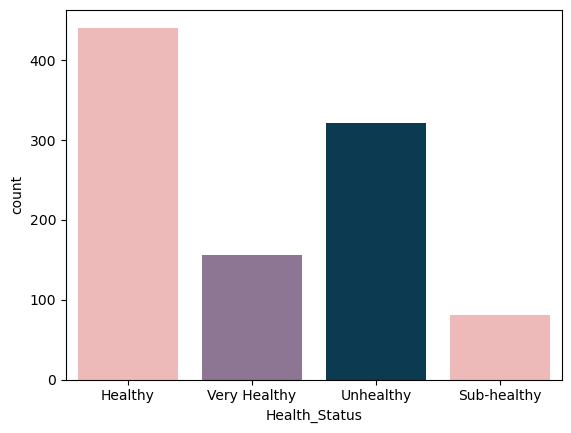

In [66]:
#first of all let us evaluate the target and find out if our data is imbalanced or not

colours=["#f7b2b0","#8f7198", "#003f5c"]
sns.countplot(data= data, x="Health_Status",palette=colours)

### Data Modeling

In [28]:
data.head()

,Plot_ID,Latitude,Longitude,DBH,Tree_Height,Crown_Width_North_South,Crown_Width_East_West,Slope,Elevation,Temperature,Humidity,Soil_TN,Soil_TP,Soil_AP,Soil_AN,Menhinick_Index,Gleason_Index,Disturbance_Level,Fire_Risk_Index,Health_Status
0,1,24.981605,-117.040695,29.862040,20.835684,6.147963,4.542720,29.171563,212.518419,30.209377,93.086241,0.379904,0.268850,0.328882,0.487287,0.682938,2.998681,0.004402,0.812948,Healthy
1,2,48.028572,-92.066934,28.462986,24.307079,8.248891,5.260921,7.757386,641.640332,29.054905,62.028839,0.339583,0.073260,0.044616,0.013501,0.723696,3.986987,0.000330,0.678542,Very Healthy
2,3,39.279758,-68.893791,91.094185,9.013101,7.841448,8.690927,39.257755,2510.612835,8.351397,77.992822,0.184392,0.297665,0.124953,0.474088,2.129934,3.250667,0.472263,0.889075,Healthy
3,4,33.946339,-78.744258,28.706889,19.496475,2.385099,4.060039,27.590231,2323.628233,37.290034,54.883864,0.611194,0.160819,0.387971,0.187495,1.717352,1.333210,0.029294,0.449336,Unhealthy
4,5,16.240746,-73.540720,30.835224,18.008888,2.343245,8.826847,7.074175,1116.863805,24.896527,70.402766,0.481858,0.030913,0.266699,0.009995,2.476038,1.742321,0.974533,0.893890,Unhealthy


In [32]:
x = data[['Plot_ID', 'Latitude', 'Longitude', 'DBH', 'Tree_Height', 'Crown_Width_North_South', 'Crown_Width_East_West', 'Slope', 
          'Elevation', 'Temperature', 'Humidity', 'Soil_TN', 'Soil_TP', 'Soil_TP', 'Soil_AP', 'Soil_AN', 'Menhinick_Index', 'Gleason_Index',
          'Disturbance_Level', 'Fire_Risk_Index']]
y = data['Health_Status']

In [33]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

In [37]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
#splitting the data into training and testing data

(800, 19) (200, 19) (800,) (200,)


### Apply Random Forest model

In [38]:
model = RandomForestClassifier(random_state=42)

In [39]:
# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [40]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [41]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.99
              precision    recall  f1-score   support

     Healthy       1.00      1.00      1.00        86
 Sub-healthy       1.00      0.93      0.97        15
   Unhealthy       0.99      1.00      0.99        69
Very Healthy       1.00      1.00      1.00        30

    accuracy                           0.99       200
   macro avg       1.00      0.98      0.99       200
weighted avg       1.00      0.99      0.99       200

